In [1]:
import numpy as np
from scipy.signal import hilbert
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d


In [76]:

def plot_(original, envelope):
    plt.figure(figsize=(8, 5))
    plt.plot(original, label="Original", color='blue', linestyle='-')
    plt.plot(envelope, label="Envelope", color='red', linestyle='--')
    
    plt.xlabel("Depth (mm)")
    plt.ylabel("Intensity")
    plt.title("Original vs Envelope Signal")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_2(original_image,output):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(output)
    axes[1].set_title("Output Image")
    axes[1].axis("off")

    plt.show()


In [ ]:
def envelope(image,envelop_func,prec):
    output_image = image.copy().T
    output_image_max = output_image.copy()

    n,m = output_image.shape

    for i in range(n):
        line = output_image[i,:]
        #line = line- np.mean(line)
        line = envelop_func(line)
        output_image[i,:] = line

        output_image_max[i,:] = search_max(line,prec)    
        
    return output_image.T,output_image_max.T

def search_max(line,prec = 0.3):
    max_index = np.argmax(line)

    output_line = line.copy()
    
    threshold = line[max_index] * (1 - prec)
    
    zero_indices = np.where(line < threshold)[0]
    output_line[zero_indices] = 0

    lhs = 0
    for i in range(0,max_index-1):
        if output_line[i] < threshold:
            lhs = i
    
    rhs = 0
    for j in range(max_index+1,line.shape[0]):
        if output_line[j] < threshold:
            rhs = j
            break            

    output_line[0:lhs] = 0
    
    output_line[rhs:line.shape[0]] = 0

    return output_line
    



In [285]:
from scipy.signal import convolve
from scipy.stats import norm

def dummy_func(line):
    return line


def square(line):
    output_line = line.copy()**2
    
    # Create a Hanning window for smoothing
    window_size = 31
    hanning_window = np.hanning(window_size)
    hanning_window /= hanning_window.sum()  # Normalize the window

    # Apply convolution for smoothing
    smoothed_line = convolve(output_line, hanning_window, mode='same')
    
    return smoothed_line





In [290]:

original_image = cv2.imread('image.png',cv2.IMREAD_GRAYSCALE)
original_image = np.uint32(original_image)
#plot_(original_image[:,index],original_image[:,index]**2)
envelop_func = square
output,output_max = envelope(original_image,envelop_func,0.5)


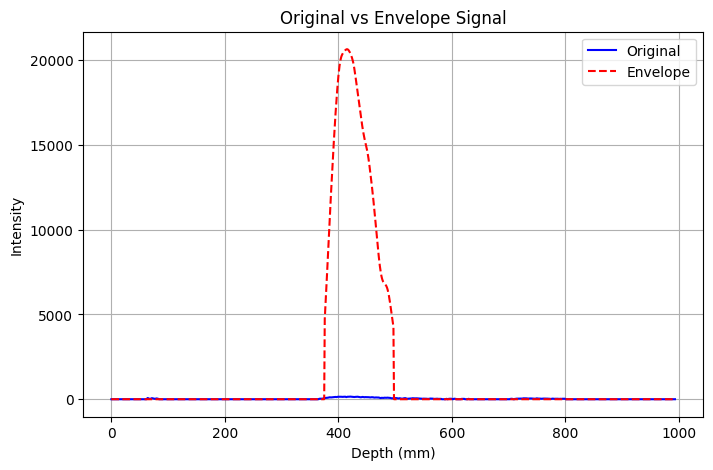

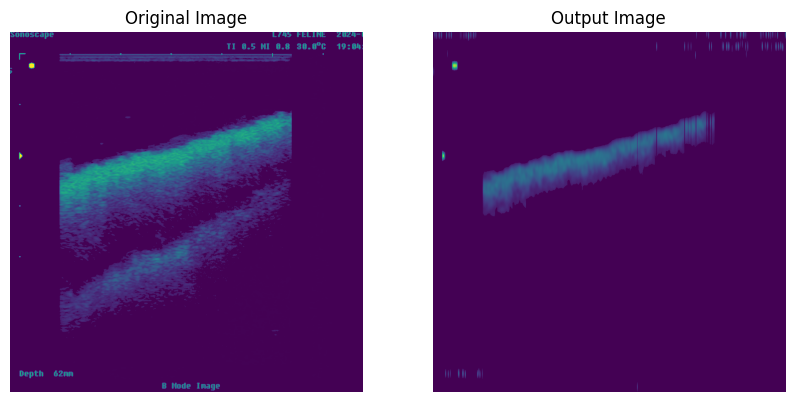

In [289]:
index = 200
plot_(original_image[:,index],output_max[:,index])
plot_2(original_image,output_max)
